# Lab - Janelas

Esta mostra a visualização de janelas no domínio do tempo e da frequência, e o efeito do janelamento no sinal senoidal.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy.signal import *

1) plote no mesmo eixo as janelas retangular, triangular, hann, hamming e blackman,com 65 valores. <br>
(dica: janelas = [boxcar, bartlett, hann, hamming, blackman] é uma lista das funções janelas, e função.\__nome é uma string como nome da função )

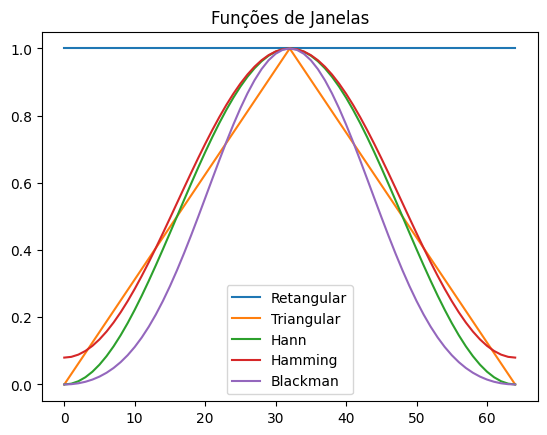

<Figure size 1200x800 with 0 Axes>

In [2]:
from scipy.signal.windows import *

# Lista de funções janelas e seus nomes
janelas = [boxcar, bartlett, hann, hamming, blackman]
nomes_janelas = ['Retangular', 'Triangular', 'Hann', 'Hamming', 'Blackman']

# Número de pontos
N = 65

# Valores x para o gráfico
x = arange(N)

# Crie uma figura e um único eixo
fig, ax = subplots()

figure(figsize=(12,8))
# Plote cada janela
for janela, nome in zip(janelas, nomes_janelas):
    w = janela(N)
    ax.plot(x, w, label=nome)

# Configure o título e as legendas
ax.set_title('Funções de Janelas')
ax.legend()

# Exiba o gráfico
show()


2) plote no mesmo eixo as transformadas de fourier das janelas retangular, triangular, hann, hamming e blackman. <br>
Considerar janelas de 16 valores, completando com zeros até 256. <br>
usar fftshift(), para ter a frequência zero no centro. <br>
Dividir os valores pelo máximo de cada janela, para possibilitar a comparação dos valores normalizados entre 0 e 1.


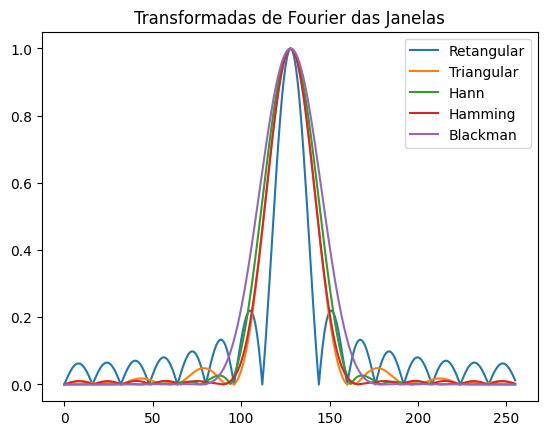

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import *


N = 16

N_zeropad = 256


fs = 1.0


x = np.arange(N_zeropad)


janelas = [boxcar, bartlett, hann, hamming, blackman]
nomes_janelas = ['Retangular', 'Triangular', 'Hann', 'Hamming', 'Blackman']

fig, ax = plt.subplots()

for janela, nome in zip(janelas, nomes_janelas):
    w = janela(N)
    w_padded = np.pad(w, (N_zeropad - N) // 2, mode='constant')
    W = np.fft.fftshift(np.fft.fft(w_padded))  
    W /= np.max(W)  
    ax.plot(x, np.abs(W), label=nome)


ax.set_title('Transformadas de Fourier das Janelas')
ax.legend()

# Exiba o gráfico
plt.show()


3) Qual dessas janelas possui espectro com menor largura do lobulo principal ? E qual dessas janelas possui menor amplitude de lóbulo lateral?


Janela boxcart e janela hamming, respectivamente

4) Plot janelas de kaiser com parametros beta=[0.1, 1, 6, 9, 12].<br>
Para comparação, plote janelas hann e blackman com simbolo 'o'.

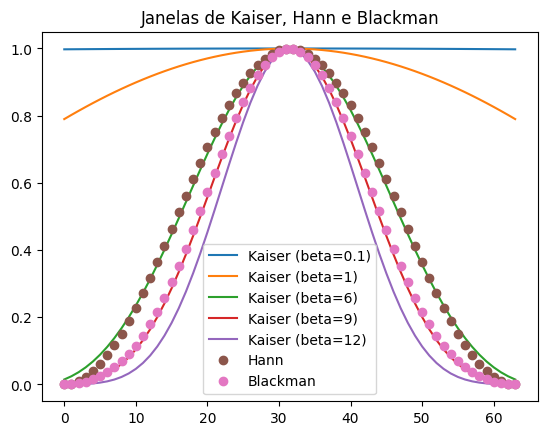

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import kaiser, hann, blackman

# Parâmetros beta para janelas de Kaiser
betas = [0.1, 1, 6, 9, 12]

# Tamanho da janela
N = 64

# Valores x para o gráfico
x = np.arange(N)

# Crie uma figura e um único eixo
fig, ax = plt.subplots()

# Plote as janelas de Kaiser com diferentes betas
for beta in betas:
    w_kaiser = kaiser(N, beta)
    ax.plot(x, w_kaiser, label=f'Kaiser (beta={beta})')

# Plote as janelas de Hann e Blackman
w_hann = hann(N)
w_blackman = blackman(N)
ax.plot(x, w_hann, 'o', label='Hann')
ax.plot(x, w_blackman, 'o', label='Blackman')

# Configure o título e as legendas
ax.set_title('Janelas de Kaiser, Hann e Blackman')
ax.legend()

# Exiba o gráfico
plt.show()


5) crie vetor x com 16 elementos, uma senoide com 4 ciclos.<br>

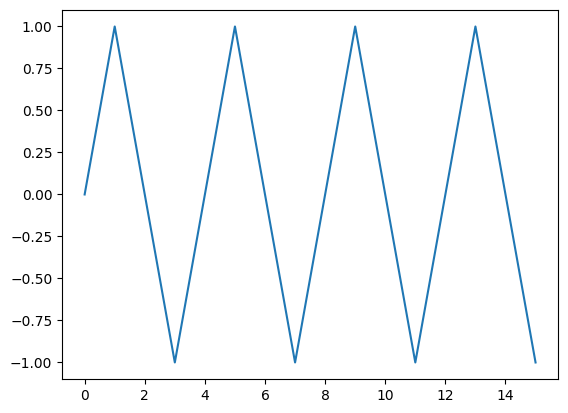

In [5]:
x = sin(linspace(0,2*pi*4,16, endpoint=False))
plot(x)
show()

6) crie vetor y, acrescentando 240 zeros ao vetor x. 

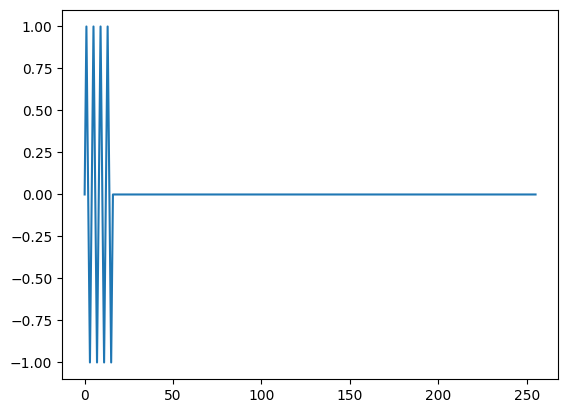

In [6]:
y = append(x,np.zeros(240))
plot(y)
show()

7) crie vetor z com 256 elementos, uma senoide com a mesma frequência. <br>

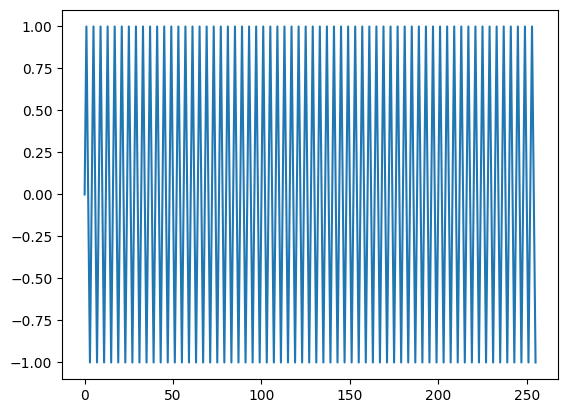

In [7]:
z = sin(linspace(0,2*pi*256/4, 256,endpoint=False))
plot(z)
show()

8) plote no mesmo eixo os espectros dos tres sinais.<br>
Dividir os valores pelo máximo de cada janela, para possibilitar a comparação dos valores normalizados entre 0 e 1.

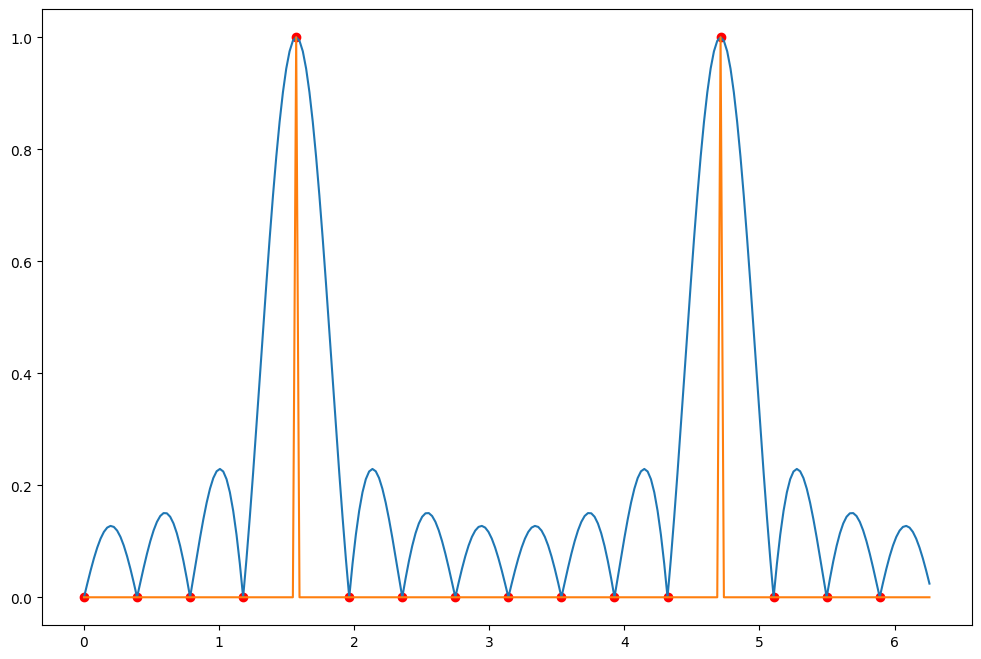

In [8]:
figure(figsize=(12,8))
kx=linspace(0, 2*pi, len(x), endpoint=False)
ky=linspace(0, 2*pi, len(y), endpoint=False)
kz=linspace(0, 2*pi, len(z), endpoint=False)

plot(kx, abs(fft(x))/8, 'ro')
plot(ky, abs(fft(y))/8)
plot(kz, abs(fft(z))/128)
plt.show()

A partir da resposta em frequência obtida é possível notar a ocorrência do vazamento. Ao aplicar o método de janelamento a componente em uma frequência "vaza" nas componentes vizinhos devido ao espalhamento espectral causado pela janela.

9) Obter o sinal zz multiplicando o sinal z por uma janela de hann de tamanho 16.

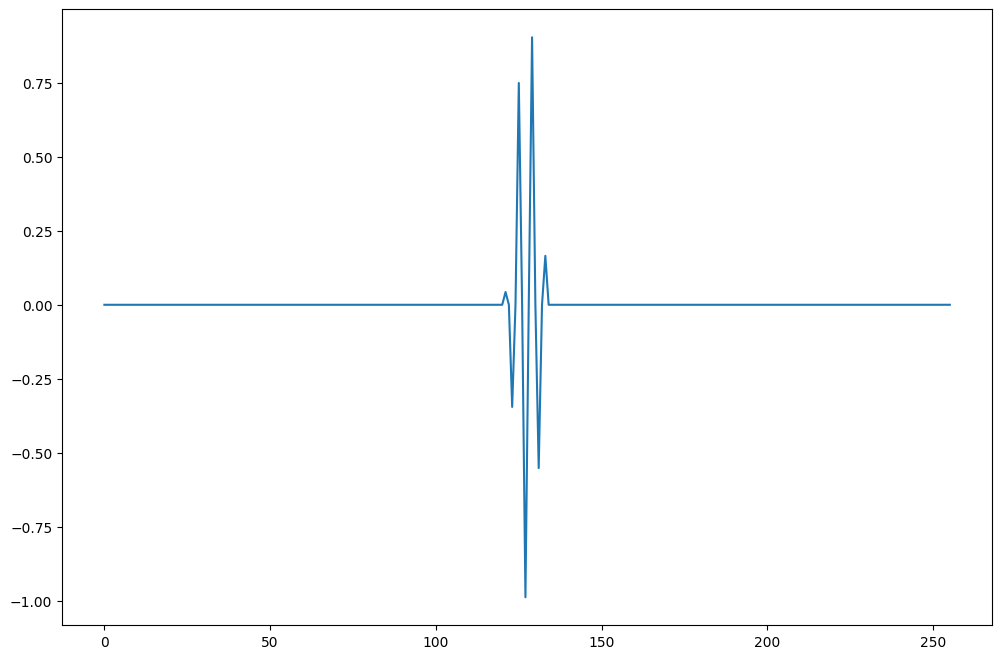

In [9]:
figure(figsize=(12,8))
hann_zeros = zeros(len(z))
hann_zeros[128-8:128+8]=hann(16)
zz = z*hann_zeros
plot(zz)
plt.show()

10) Plote no mesmo eixo os espectros dos tres sinais do item 8) e o espectro de zz.<br>
Dividir os valores pelo máximo de cada janela, para possibilitar a comparação dos valores normalizados entre 0 e 1.

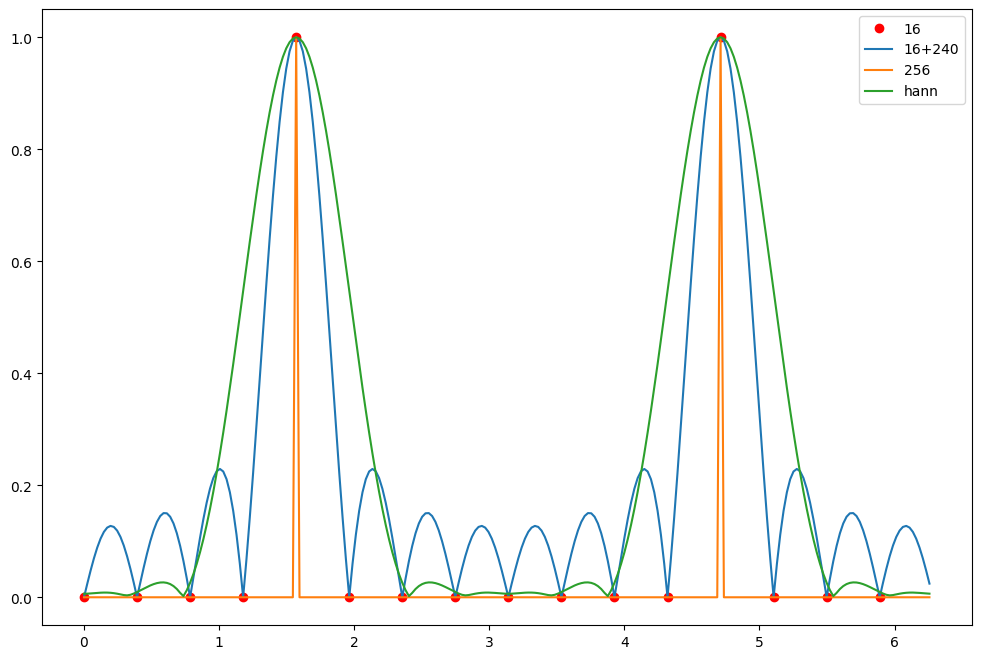

In [10]:
figure(figsize=(12,8))
plot(kx, abs(fft(x))/8, 'ro', label=("16"))
plot(ky, abs(fft(y))/8, label=("16+240"))
plot(kz, abs(fft(z))/128, label=("256"))
plot(kz, abs(fft(zz))/max(abs(fft(zz))), label=("hann"))
legend()
plt.show()